In [1]:
from astropy.io import fits
from astropy import units, constants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner
from voigt_fit_lib import *
import os
import pickle

Load in the files

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/'

First, the FUV files

In [3]:
spec_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new.fits')
lsf_fits_fuv = fits.open(rootdir + 'FUV/PG1522_COS_FUV_wavcal2022_lsf_ZQ.fits')

Then, the NUV files

In [4]:
spec_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new.fits')
lsf_fits_nuv = fits.open(rootdir + 'G185M/PG1522_COS_NUV_wavcal2022_lsf.fits')

Then, the STIS files

In [5]:
spec_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new.fits')
lsf_fits_stis = fits.open(rootdir + 'STIS/PG1522_STIS_NUV_wavcal2022_lsf.fits')

Then, the HIRES files

In [6]:
spec_fits_hires = fits.open(rootdir + 'HIRES/PG1522+101_HIRES.fits')
lsf_fits_hires = fits.open(rootdir + 'HIRES/PG1522_HIRES_wavcal2023_lsf.fits')

Compile a list of the spectra, continuum nodes, and IDs for all detectors

In [7]:
spec_fits_list = [spec_fits_fuv, spec_fits_nuv, spec_fits_stis, spec_fits_hires]
lsf_fits_list = [lsf_fits_fuv, lsf_fits_nuv, lsf_fits_stis, lsf_fits_hires]

Systemic redshift

In [8]:
z_sys = 0.6164 #0.72882616 #0.72882414 

In [9]:
#np.round(0.72882616 - ((1+0.72882616)*0.12/3e+5), 8)

# CIV

## CIV 1550

In [10]:
civ_1550_stis = ion_transition('CIV', 1550, 'C', z_sys, 'STIS')

In [11]:
civ_1550_stis.grab_ion_transition_info()

In [15]:
civ_1550_stis.grab_ion_transition_spec(spec_fits_list)

In [16]:
civ_1550_stis.cont_norm_flux(v_abs_range=[-140,50], degree=1)

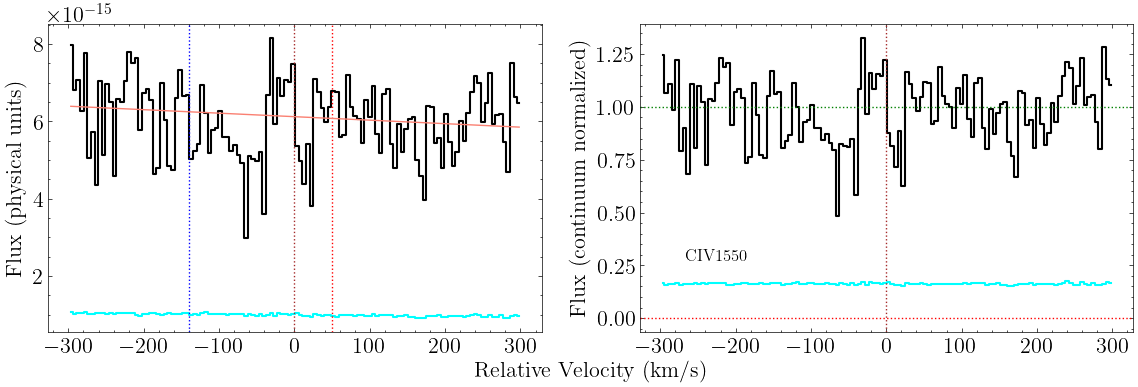

In [17]:
fig, ax = civ_1550_stis.plot_ion_transition_spec_cont()

In [19]:
civ_1550_stis.grab_ion_transition_lsf(lsf_fits_list)

In [26]:
civ_1550_stis.init_ion_transition(init_values = np.array([[13.5, 14, -60]]), 
                             lsf_convolve = True)

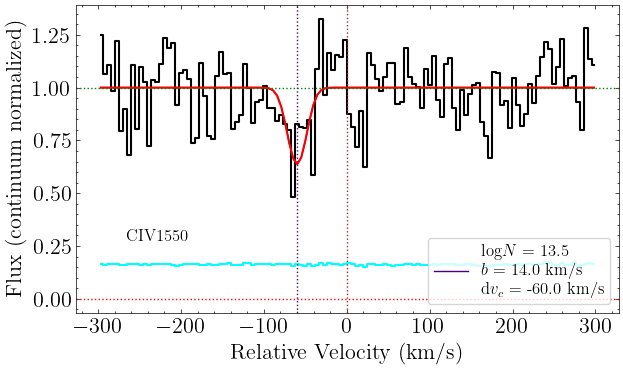

In [27]:
fig, ax = civ_1550_stis.plot_ion_transition_init_fit()

In [28]:
civ_1550_stis.fit_ion_transition()

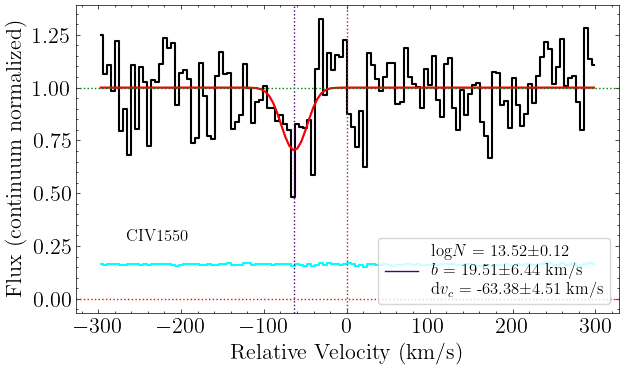

In [29]:
fig, ax = civ_1550_stis.plot_ion_transition_best_fit()

## CIV 1548

In [30]:
civ_1548_stis = ion_transition('CIV', 1548, 'C', z_sys, 'STIS')

In [31]:
civ_1548_stis.grab_ion_transition_info()

In [43]:
civ_1548_stis.grab_ion_transition_spec(spec_fits_list, masks=[[0,210]])

In [44]:
civ_1548_stis.cont_norm_flux(v_abs_range=[-120,50], degree=1)

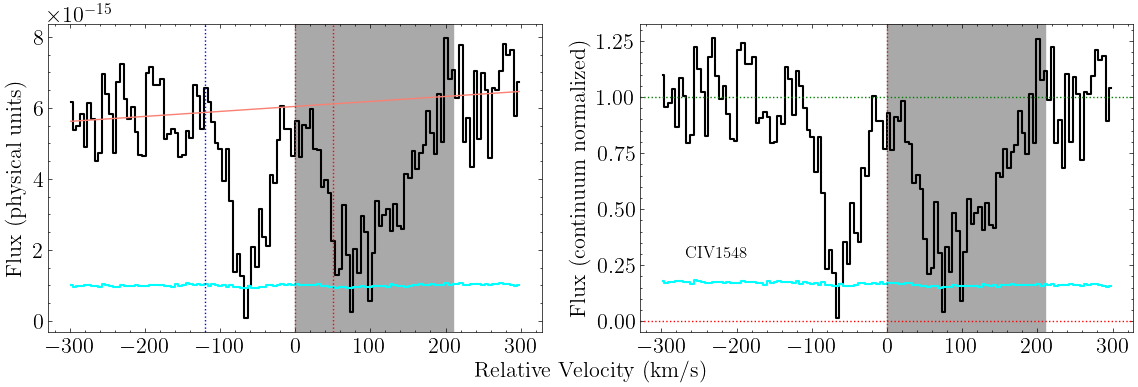

In [45]:
fig, ax = civ_1548_stis.plot_ion_transition_spec_cont()

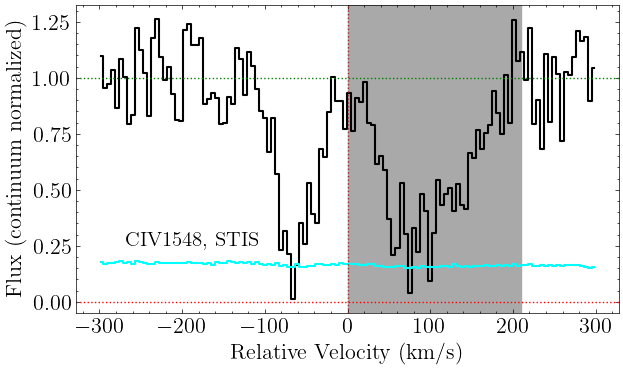

In [46]:
fig, ax = civ_1548_stis.plot_ion_transition_spec()

In [29]:
#civ_1548_nuv.get_EW_total(-50,50)

In [47]:
civ_1548_stis.grab_ion_transition_lsf(lsf_fits_list)

In [49]:
civ_1548_stis.init_ion_transition(init_values = np.array([[13.5, 19, -64]]), 
                             lsf_convolve = True)

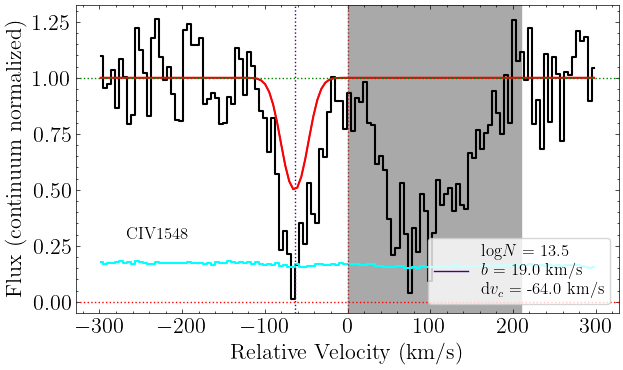

In [50]:
fig, ax = civ_1548_stis.plot_ion_transition_init_fit()

# HI

## HI 1215

In [60]:
hi_1215_nuv = ion_transition('HI', 1215, 'H', z_sys, 'NUV')

In [61]:
hi_1215_nuv.grab_ion_transition_info()

In [62]:
hi_1215_nuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-170],[160,300]])

In [63]:
hi_1215_nuv.cont_norm_flux(v_abs_range=[-50,50], degree=1)

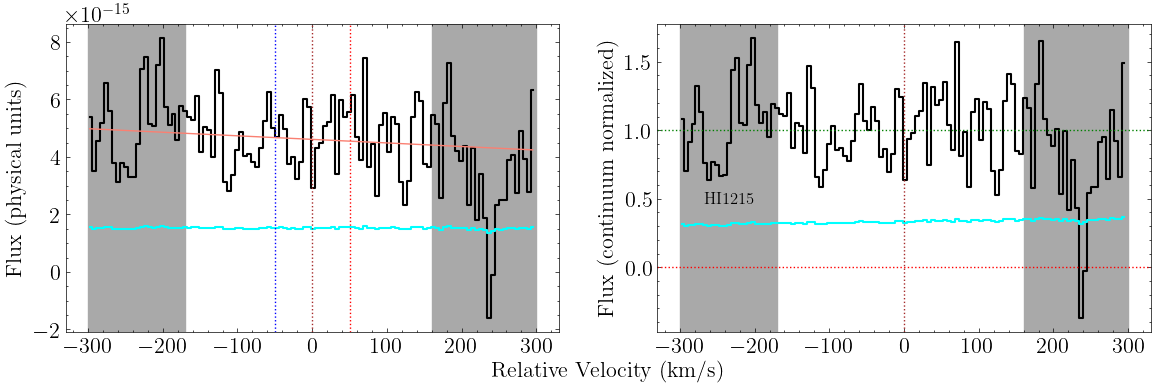

In [64]:
fig, ax = hi_1215_nuv.plot_ion_transition_spec_cont()

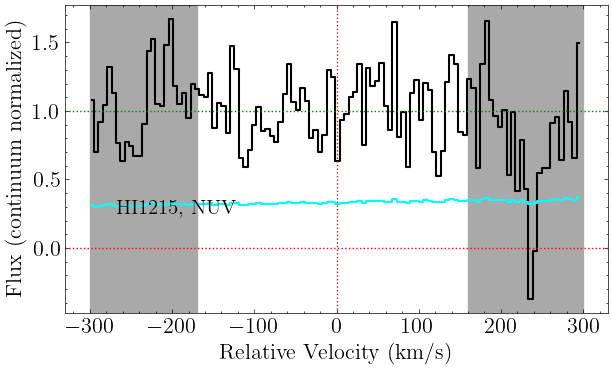

In [65]:
fig, ax = hi_1215_nuv.plot_ion_transition_spec()

# OIV

## OIV 787

In [66]:
oiv_787_fuv = ion_transition('OIV', 787, 'O', z_sys, 'FUV')

In [67]:
oiv_787_fuv.grab_ion_transition_info()

In [68]:
oiv_787_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-170],[160,300]])

In [69]:
oiv_787_fuv.cont_norm_flux(v_abs_range=[-50,50], degree=1)

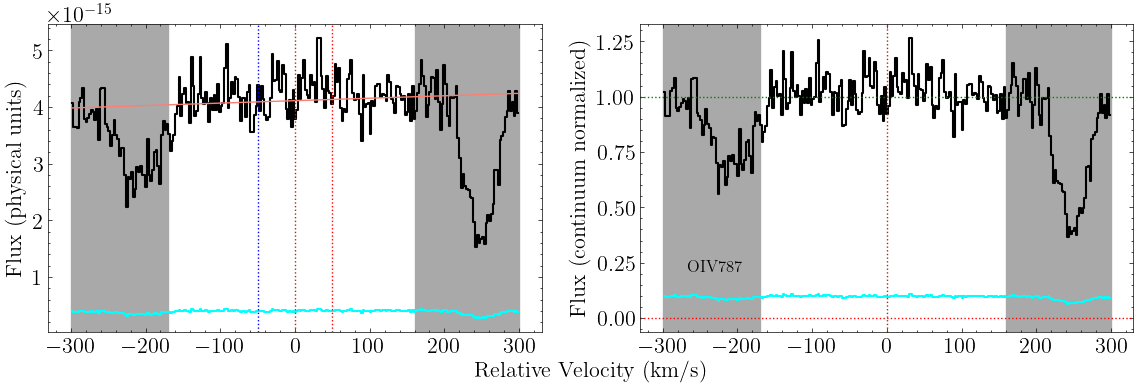

In [70]:
fig, ax = oiv_787_fuv.plot_ion_transition_spec_cont()

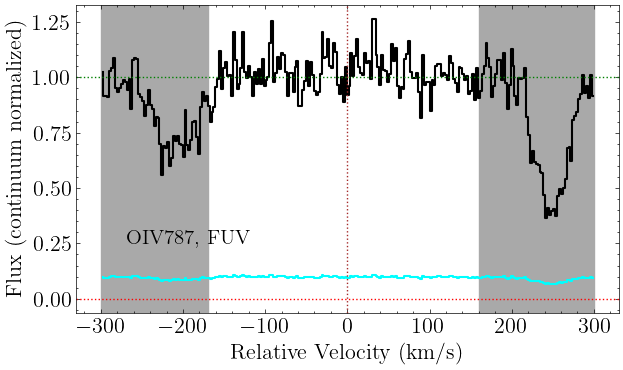

In [71]:
fig, ax = oiv_787_fuv.plot_ion_transition_spec()

# CIII

## CIII 977

In [72]:
ciii_977_fuv = ion_transition('CIII', 977, 'C', z_sys, 'FUV')

In [73]:
ciii_977_fuv.grab_ion_transition_info()

In [80]:
ciii_977_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-170],[80,300]])

In [81]:
ciii_977_fuv.cont_norm_flux(v_abs_range=[-50,50], degree=1)

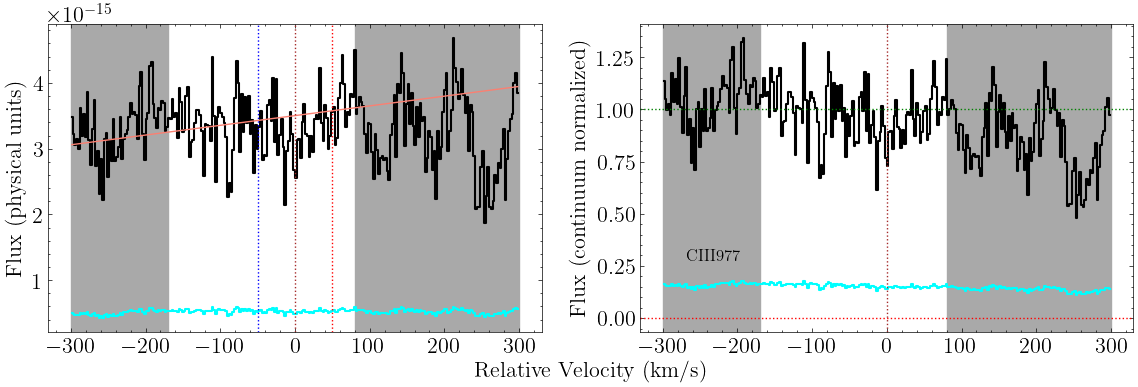

In [82]:
fig, ax = ciii_977_fuv.plot_ion_transition_spec_cont()

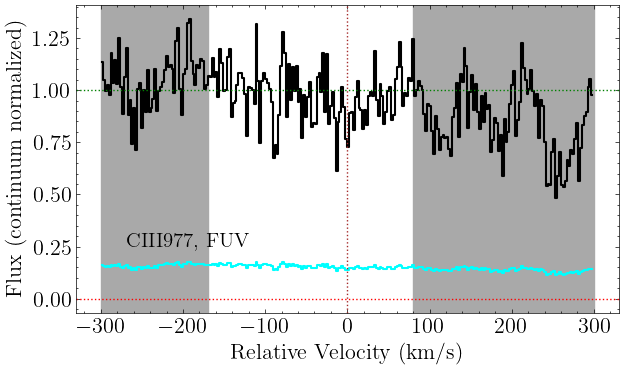

In [83]:
fig, ax = ciii_977_fuv.plot_ion_transition_spec()